# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 16.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 17.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 17.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [21]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [22]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [23]:
client = MongoClient(mongod_connect)
db = client.gp15 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [25]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [26]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [27]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1329220023508889608
1329220026197413889
1329220026868621313
1329220027736788993
1329220028357611522
1329220029670363139
1329220030563684354
1329220031943684098
1329220032262336512
1329220033843769347
1329220034200268801
1329220034389028864
1329220034443546626
1329220037526376448
1329220037631119360
1329220037719289858
1329220038256185344
1329220040214896640
1329220040936345602
1329220041162838018
1329220041540317205
1329220042379104257
1329220042504904705
1329220042555355136
1329220044035911686
1329220045298286592
1329220045482897417
1329220045730267136
1329220046258917376
1329220046699311104
1329220048527888385
1329220048997806083
1329220049933012994
1329220050344161280
1329220051103170561
1329220051363356683
1329220052047044613
1329220053565366272
1329220053699600384
1329220054806880257
1329220056128122881
1329220057184964608
1329220059118571525
1329220060552957953
1329220062008500225
1329220062788521985
1329220063455490051
1329220064458010624
1329220065024204801
1329220065523347457


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [28]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [29]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [30]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:56 +0000 2020'
'Thu Nov 19 02:19:55 +0000 2020'
'Thu Nov 19 02:19:55 +0000 2020'
'Thu Nov 19 02:19:55 +0000 2020'
'Thu Nov 19 02:19:55 +0000 2020'
'Thu Nov 19 02:19:55 +0000 2020'
'Thu Nov 19 02:19:54 +0000 2020'
'Thu Nov 19 02:19:53 +0000 2020'
'Thu Nov 19 02:19:53 +0000 2020'
'Thu Nov 19 02:19:53 +0000 2020'
'Thu Nov 19 02:19:52 +0000 2020'
'Thu Nov 19 02:19:52 +0000 2020'
'Thu Nov 19 02:19:51 +0000 2020'
'Thu Nov 19 02:19:51 +0000 2020'
'Thu Nov 19 02:19:51 +0000 2020'
'Thu Nov 19 02:19:50 +0000 2020'
'Thu Nov 19 02:19:50 +0000 2020'
'Thu Nov 19 02:19:50 +0000 2020'
'Thu Nov 19 02:19:50 +0000 2020'
'Thu Nov 19 02:19:50 +0000 2020'
'Thu Nov 19 02:19:49 +0000 2020'
'Thu Nov 19 02:19:49 +0000 2020'
'Thu Nov 19 02:19:49 +0000 2020'
'Thu Nov 19 02:19:48 +0000 2020'
'Thu Nov 19 02:19:48 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [31]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 19 02:19:28 +0000 2020'
'Thu Nov 19 02:19:27 +0000 2020'
'Thu Nov 19 02:19:27 +0000 2020'
'Thu Nov 19 02:19:27 +0000 2020'
'Thu Nov 19 02:19:27 +0000 2020'
'Thu Nov 19 02:19:26 +0000 2020'
'Thu Nov 19 02:19:25 +0000 2020'
'Thu Nov 19 02:19:25 +0000 2020'
'Thu Nov 19 02:19:25 +0000 2020'
'Thu Nov 19 02:19:24 +0000 2020'
'Thu Nov 19 02:19:24 +0000 2020'
'Thu Nov 19 02:19:24 +0000 2020'
'Thu Nov 19 02:19:23 +0000 2020'
'Thu Nov 19 02:19:23 +0000 2020'
'Thu Nov 19 02:19:23 +0000 2020'
'Thu Nov 19 02:19:22 +0000 2020'
'Thu Nov 19 02:19:22 +0000 2020'
'Thu Nov 19 02:19:21 +0000 2020'
'Thu Nov 19 02:19:21 +0000 2020'
'Thu Nov 19 02:19:21 +0000 2020'
'Thu Nov 19 02:19:21 +0000 2020'
'Thu Nov 19 02:19:20 +0000 2020'
'Thu Nov 19 02:19:20 +0000 2020'
'Thu Nov 19 02:19:20 +0000 2020'
'Thu Nov 19 02:19:19 +0000 2020'
'Thu Nov 19 02:19:19 +0000 2020'
'Thu Nov 19 02:19:19 +0000 2020'
'Thu Nov 19 02:19:18 +0000 2020'
'Thu Nov 19 02:19:17 +0000 2020'
'Thu Nov 19 02:19:17 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:18:08 +0000 2020'
'Thu Nov 19 02:18:08 +0000 2020'
'Thu Nov 19 02:18:07 +0000 2020'
'Thu Nov 19 02:18:07 +0000 2020'
'Thu Nov 19 02:18:06 +0000 2020'
'Thu Nov 19 02:18:06 +0000 2020'
'Thu Nov 19 02:18:06 +0000 2020'
'Thu Nov 19 02:18:06 +0000 2020'
'Thu Nov 19 02:18:06 +0000 2020'
'Thu Nov 19 02:18:05 +0000 2020'
'Thu Nov 19 02:18:05 +0000 2020'
'Thu Nov 19 02:18:04 +0000 2020'
'Thu Nov 19 02:18:04 +0000 2020'
'Thu Nov 19 02:18:04 +0000 2020'
'Thu Nov 19 02:18:04 +0000 2020'
'Thu Nov 19 02:18:03 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:02 +0000 2020'
'Thu Nov 19 02:18:01 +0000 2020'
'Thu Nov 19 02:18:01 +0000 2020'
'Thu Nov 19 02:18:01 +0000 2020'
'Thu Nov 19 02:18:01 +0000 2020'
'Thu Nov 19 02:18:00 +0000 2020'
'Thu Nov 19 02:18:00 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:16:57 +0000 2020'
'Thu Nov 19 02:16:56 +0000 2020'
'Thu Nov 19 02:16:56 +0000 2020'
'Thu Nov 19 02:16:56 +0000 2020'
'Thu Nov 19 02:16:56 +0000 2020'
'Thu Nov 19 02:16:56 +0000 2020'
'Thu Nov 19 02:16:55 +0000 2020'
'Thu Nov 19 02:16:55 +0000 2020'
'Thu Nov 19 02:16:55 +0000 2020'
'Thu Nov 19 02:16:55 +0000 2020'
'Thu Nov 19 02:16:54 +0000 2020'
'Thu Nov 19 02:16:54 +0000 2020'
'Thu Nov 19 02:16:54 +0000 2020'
'Thu Nov 19 02:16:53 +0000 2020'
'Thu Nov 19 02:16:52 +0000 2020'
'Thu Nov 19 02:16:52 +0000 2020'
'Thu Nov 19 02:16:51 +0000 2020'
'Thu Nov 19 02:16:51 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:50 +0000 2020'
'Thu Nov 19 02:16:49 +0000 2020'
'Thu Nov 19 02:16:49 +0000 2020'
'Thu Nov 19 02:16:48 +0000 2020'
'Thu Nov 19 02:16:48 +0000 2020'
'Thu Nov 19 02:16:48 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:45 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:44 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:43 +0000 2020'
'Thu Nov 19 02:15:42 +0000 2020'
'Thu Nov 19 02:15:42 +0000 2020'
'Thu Nov 19 02:15:41 +0000 2020'
'Thu Nov 19 02:15:41 +0000 2020'
'Thu Nov 19 02:15:41 +0000 2020'
'Thu Nov 19 02:15:41 +0000 2020'
'Thu Nov 19 02:15:40 +0000 2020'
'Thu Nov 19 02:15:40 +0000 2020'
'Thu Nov 19 02:15:40 +0000 2020'
'Thu Nov 19 02:15:40 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:14:37 +0000 2020'
'Thu Nov 19 02:14:36 +0000 2020'
'Thu Nov 19 02:14:36 +0000 2020'
'Thu Nov 19 02:14:36 +0000 2020'
'Thu Nov 19 02:14:36 +0000 2020'
'Thu Nov 19 02:14:36 +0000 2020'
'Thu Nov 19 02:14:35 +0000 2020'
'Thu Nov 19 02:14:35 +0000 2020'
'Thu Nov 19 02:14:35 +0000 2020'
'Thu Nov 19 02:14:35 +0000 2020'
'Thu Nov 19 02:14:34 +0000 2020'
'Thu Nov 19 02:14:34 +0000 2020'
'Thu Nov 19 02:14:34 +0000 2020'
'Thu Nov 19 02:14:34 +0000 2020'
'Thu Nov 19 02:14:34 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:33 +0000 2020'
'Thu Nov 19 02:14:32 +0000 2020'
'Thu Nov 19 02:14:32 +0000 2020'
'Thu Nov 19 02:14:32 +0000 2020'
'Thu Nov 19 02:14:31 +0000 2020'
'Thu Nov 19 02:14:31 +0000 2020'
'Thu Nov 19 02:14:31 +0000 2020'
'Thu Nov 19 02:14:31 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:13:26 +0000 2020'
'Thu Nov 19 02:13:26 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:25 +0000 2020'
'Thu Nov 19 02:13:24 +0000 2020'
'Thu Nov 19 02:13:24 +0000 2020'
'Thu Nov 19 02:13:24 +0000 2020'
'Thu Nov 19 02:13:23 +0000 2020'
'Thu Nov 19 02:13:23 +0000 2020'
'Thu Nov 19 02:13:23 +0000 2020'
'Thu Nov 19 02:13:22 +0000 2020'
'Thu Nov 19 02:13:22 +0000 2020'
'Thu Nov 19 02:13:22 +0000 2020'
'Thu Nov 19 02:13:21 +0000 2020'
'Thu Nov 19 02:13:21 +0000 2020'
'Thu Nov 19 02:13:21 +0000 2020'
'Thu Nov 19 02:13:21 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:20 +0000 2020'
'Thu Nov 19 02:13:19 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:12:09 +0000 2020'
'Thu Nov 19 02:12:09 +0000 2020'
'Thu Nov 19 02:12:09 +0000 2020'
'Thu Nov 19 02:12:08 +0000 2020'
'Thu Nov 19 02:12:08 +0000 2020'
'Thu Nov 19 02:12:08 +0000 2020'
'Thu Nov 19 02:12:07 +0000 2020'
'Thu Nov 19 02:12:07 +0000 2020'
'Thu Nov 19 02:12:07 +0000 2020'
'Thu Nov 19 02:12:06 +0000 2020'
'Thu Nov 19 02:12:05 +0000 2020'
'Thu Nov 19 02:12:05 +0000 2020'
'Thu Nov 19 02:12:05 +0000 2020'
'Thu Nov 19 02:12:05 +0000 2020'
'Thu Nov 19 02:12:04 +0000 2020'
'Thu Nov 19 02:12:04 +0000 2020'
'Thu Nov 19 02:12:04 +0000 2020'
'Thu Nov 19 02:12:04 +0000 2020'
'Thu Nov 19 02:12:04 +0000 2020'
'Thu Nov 19 02:12:03 +0000 2020'
'Thu Nov 19 02:12:03 +0000 2020'
'Thu Nov 19 02:12:03 +0000 2020'
'Thu Nov 19 02:12:03 +0000 2020'
'Thu Nov 19 02:12:02 +0000 2020'
'Thu Nov 19 02:12:02 +0000 2020'
'Thu Nov 19 02:12:01 +0000 2020'
'Thu Nov 19 02:12:01 +0000 2020'
'Thu Nov 19 02:12:00 +0000 2020'
'Thu Nov 19 02:12:00 +0000 2020'
'Thu Nov 19 02:12:00 +0000 2020'
'Thu Nov 1

'Thu Nov 19 02:10:50 +0000 2020'
'Thu Nov 19 02:10:49 +0000 2020'
'Thu Nov 19 02:10:49 +0000 2020'
'Thu Nov 19 02:10:49 +0000 2020'
'Thu Nov 19 02:10:49 +0000 2020'
'Thu Nov 19 02:10:48 +0000 2020'
'Thu Nov 19 02:10:48 +0000 2020'
'Thu Nov 19 02:10:48 +0000 2020'
'Thu Nov 19 02:10:48 +0000 2020'
'Thu Nov 19 02:10:47 +0000 2020'
'Thu Nov 19 02:10:47 +0000 2020'
'Thu Nov 19 02:10:47 +0000 2020'
'Thu Nov 19 02:10:47 +0000 2020'
'Thu Nov 19 02:10:46 +0000 2020'
'Thu Nov 19 02:10:46 +0000 2020'
'Thu Nov 19 02:10:46 +0000 2020'
'Thu Nov 19 02:10:46 +0000 2020'
'Thu Nov 19 02:10:45 +0000 2020'
'Thu Nov 19 02:10:45 +0000 2020'
'Thu Nov 19 02:10:44 +0000 2020'
'Thu Nov 19 02:10:44 +0000 2020'
'Thu Nov 19 02:10:44 +0000 2020'
'Thu Nov 19 02:10:43 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [32]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2105
1891


Create a text index and print the Tweets containing specific keywords. 

In [33]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [34]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [35]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: BettyFellows
text: RT @ashtonpittman: No, @GSAEmily isn't "struggling," &amp; CNN shouldn't help her put that narrative out.

The results of the election are clea…
----
name: Christopher Pirri
text: RT @coopSpeak: Leaders who don’t guise campaigning for re-election as #COVID19 updates. #onpoli #electioneering
----
name: Alex Betsos, Marquis De Réagent
text: RT @CryingWolfe: Not to mention all that time in the fall #bcndp wasted prepping for an unnecessary election rather than the second #covid1…
----
name: Manny Funes
text: The election is over but the fight for our live continue and somehow Republicans don't seem to give a damn about it… https://t.co/JU78Y70jdw
----
name: Wat Tyler
text: RT @CryingWolfe: Not to mention all that time in the fall #bcndp wasted prepping for an unnecessary election rather than the second #covid1…
----
name: Michael Vatikiotis
text: In #Malaysia politics is perpetual; the Westminster-style  parliamentary system generates frequent by-elections.… 

In [36]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [37]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,quoted_status_id,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status,possibly_sensitive
0,5fb6cb2a54780ff343bd9ddd,Thu Nov 19 02:10:51 +0000 2020,1329245724232466434,1329245724232466434,"RT @ashtonpittman: No, @GSAEmily isn't ""strugg...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,True,1.329063e+18,1329063047944691715,27,0,False,False,en,NaN,NaN
1,5fb6cb2954780ff343bd9d68,Thu Nov 19 02:11:25 +0000 2020,1329245868436885511,1329245868436885511,RT @coopSpeak: Leaders who don’t guise campaig...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,True,1.329183e+18,1329182821647327232,14,0,False,False,en,NaN,NaN
2,5fb6cb2354780ff343bd9b93,Thu Nov 19 02:13:42 +0000 2020,1329246443148722176,1329246443148722176,RT @CryingWolfe: Not to mention all that time ...,False,"{'hashtags': [{'text': 'bcndp', 'indices': [58...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,True,1.329225e+18,1329224899341164544,3,0,False,False,en,NaN,NaN
3,5fb6cb1a54780ff343bd98a2,Thu Nov 19 02:17:00 +0000 2020,1329247271289020416,1329247271289020416,The election is over but the fight for our liv...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,True,1.329086e+18,1329086080893612046,4,27,False,False,en,{'created_at': 'Wed Nov 18 15:36:29 +0000 2020...,False
4,5fb6cb1554780ff343bd96f4,Thu Nov 19 02:19:02 +0000 2020,1329247782692036608,1329247782692036608,RT @CryingWolfe: Not to mention all that time ...,False,"{'hashtags': [{'text': 'bcndp', 'indices': [58...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,True,1.329225e+18,1329224899341164544,3,0,False,False,en,NaN,NaN
5,5fb6cb2954780ff343bd9d98,Thu Nov 19 02:11:11 +0000 2020,1329245809506885633,1329245809506885633,In #Malaysia politics is perpetual; the Westmi...,True,"{'hashtags': [{'text': 'Malaysia', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,True,1.329012e+18,1329011806275203074,4,2,False,False,en,{'created_at': 'Wed Nov 18 10:41:21 +0000 2020...,False
6,5fb6cb2654780ff343bd9c43,Thu Nov 19 02:12:55 +0000 2020,1329246242522550272,1329246242522550272,RT @jagowriter: In #Malaysia politics is perpe...,False,"{'hashtags': [{'text': 'Malaysia', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,True,1.329012e+18,1329011806275203074,4,0,False,False,en,NaN,NaN
7,5fb6cb1f54780ff343bd9a3f,Thu Nov 19 02:15:10 +0000 2020,1329246810112729091,1329246810112729091,"@GSAEmily More Americans are dying of Covid19,...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.324774e+18,...,False,NaN,NaN,0,0,False,False,en,NaN,NaN
8,5fb6cb1c54780ff343bd992a,Thu Nov 19 02:16:21 +0000 2020,1329247108633858053,1329247108633858053,"@realDonaldTrump @justin_hart 250,000 people h...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.329234e+18,...,False,NaN,NaN,0,0,False,False,en,NaN,NaN
9,5fb6cb2a54780ff343bd9dd6,Thu Nov 19 02:10:53 +0000 2020,1329245733535375362,1329245733535375362,RT @StLukesAnita: For people who claim hospita...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code'

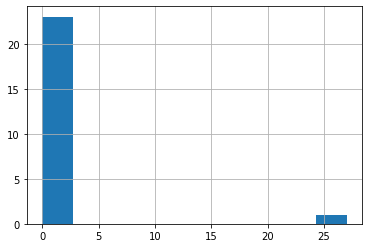

In [38]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count